# Overview
- <a href='Lending_Club_Case_Study'>Lending Club Case Study</a>
- <a href='Setup_notebook'>Setup notebook</a>
- <a href='Read_data_and_Cleaning'>Read data and Cleaning</a>
- <a href='Data_Analysis'>Data Analysis</a>
- <a href='Bivariate_Analysis'>Bivariate Analysis</a>

## Lending Club Case Study

Submitted By : *Sameeksha Chiguru and Ankur Dhuriya* 

### Business Context

There is a consumer finance company which specialises in lending various types of dfs to urban customers. When the company receives a df application, the company has to make a decision for df approval based on the applicant’s profile. Once the application is accepted and the df has to be sanctioned. The risk associated with that is either borrower will repay the amount in installments (both principal and interst) completely or can default leading to credit loss for the company.

### Problem Statement

Identify the risky df applicants, so that such dfs can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study. Also, company wants to understand the driving factors (or driver variables) behind df default. i.e., the variables which strong indicators of default.
Two types of risks are associated with the bank’s decision:

1. If the applicant is likely to repay the df, then not approving the df results in a loss of business to the company

2. If the applicant is not likely to repay the df, i.e. he/she is likely to default, then approving the df may lead to a financial loss for the company

### Dataset Information
The df dataset contains the complete df data for all dfs issued through the time period 2007 t0 2011. It contains information about customer and df attributes of the previously approved df applicants.

### Import Libraries for analysis

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for visualization
import seaborn as sns
import warnings

# Suppressing all warnings
warnings.filterwarnings('ignore')

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline
plt.style.use('bmh')

## <a id='Setup_A'>Data Analysis</a>

In [2]:
# Set up jupyter notebook options to work.
from IPython.display import display, HTML
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
# If necessary use the set options of the display . If not required. disable 
pd.set_option('display.max_columns', 70)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 1000)
pd.options.display.max_rows = 999

In [4]:
#Change the float format for display in notebook
pd.options.display.float_format = '{:,.2f}'.format

## <a id='Read_data_and_Cleaning'>Read data and Cleaning</a>

In [5]:
raw_file_path = './data/loan.csv'

In [6]:
df = pd.read_csv(raw_file_path)

In [7]:
print("Rows : {}, Columns : {}".format(*df.shape))

Rows : 39717, Columns : 111


check column names, data types and other info.

In [8]:
pd.set_option('max_info_columns', 115)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

In [9]:
pd.reset_option('max_info_columns')

make sure that number of duplicate rows are zero (Key column duplicated or not)

In [10]:
sum(df.duplicated(subset = "id")) == 0

True

list of columns where null values are present

In [11]:
df.columns[df.isna().any()].tolist()

['emp_title',
 'emp_length',
 'desc',
 'title',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'revol_util',
 'last_pymnt_d',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'chargeoff_within_12_mths',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il

There are many columns which have null values

Remove Columns for which all rows are NULL

In [12]:
df = df.loc[:, df.isna().mean()<1.0]

In [13]:
df.shape

(39717, 57)

Removed 54 columns

In [14]:
any([df[cols].isna().mean() == 1.0 for cols in df])

False

There will be 39717 rows and 57 columns remaining in the data frame after clean up.

There are numerous non-essential arrtibutes or columns with predominantly NA or 0 values. The columns which are not useful for EDA required to be removed from the data frame.
Further analysis on each of the remaining columns to understand the key which are the driving factor for our risk analysis.

Following columns are non-essential for our analysis  hence they can be removed </br>
Also, they are text based and not Key driving factors in the analysis.

- df Title - A title name provided by the borrower
- df Desc - A string details the purpose of the df
- URL - A web address specific to a particular df application record.

In [15]:
df.drop(columns=['url','desc','title'],axis=1,inplace=True)
df.head(6)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,"4,975.00",36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,"24,000.00",Verified,Dec-11,Fully Paid,n,credit_card,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,"5,863.16","5,833.84","5,000.00",863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
1,1077430,1314167,2500,2500,"2,500.00",60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,"30,000.00",Source Verified,Dec-11,Charged Off,n,car,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,"1,008.71","1,008.71",456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
2,1077175,1313524,2400,2400,"2,400.00",36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,"12,252.00",Not Verified,Dec-11,Fully Paid,n,small_business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,"3,005.67","3,005.67","2,400.00",605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
3,1076863,1277178,10000,10000,"10,000.00",36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,"49,200.00",Source Verified,Dec-11,Fully Paid,n,other,917xx,CA,20.00,0,Feb-96,1,35.00,NaN,10,0,5598,21%,37,f,0.00,0.00,"12,231.89","12,231.89","10,000.00","2,214.92",16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
4,1075358,1311748,3000,3000,"3,000.00",60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,"80,000.00",Source Verified,Dec-11,Current,n,other,972xx,OR,17.94,0,Jan-96,0,38.00,NaN,15,0,27783,53.90%,38,f,524.06,524.06,"3,513.33","3,513.33","2,475.94","1,037.39",0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
5,1075269,1311441,5000,5000,"5,000.00",36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,"36,000.00",Source Verified,Dec-11,Fully Paid,n,wedding,852xx,AZ,11.20,0,Nov-04,3,NaN,NaN,9,0,7963,28.30%,12,f,0.00,0.00,"5,632.21","5,632.21","5,000.00",632.21,0.00,0.00,0.00,Jan-15,161.03,NaN,Jan-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00


The Columns which are having either 0 or NA as values.
1. tax_liens    
2. chargeoff_within_12_mths  
3. collections_12_mths_ex_med  
4. acc_now_delinq  
5. delinq_amnt  
</br>
So, we can safely drop the above columns.

In [16]:
df.drop(
    columns=['tax_liens', 'chargeoff_within_12_mths', 'collections_12_mths_ex_med', 'acc_now_delinq', 'delinq_amnt'],
    axis=1,
    inplace=True)

Also, there are columns (categorical attributes)  contains only one value for all rows. </br>
Since thease columns have only one value in all rows and does not yield any valuable insights for our analysis </br>
hence drop the column from df data frame.</br>
1.  pymnt_plan - contains only 'n'
2.  initial_list_status - contains only 'f'
3.  policy_code - contains only '1'
4.  application_type - contains only 'INDIVIDUAL'

In [17]:
df.drop(
    columns=['pymnt_plan', 'initial_list_status', 'policy_code', 'application_type'],
    axis=1,
    inplace=True)

In [18]:
df.shape

(39717, 45)

In [19]:
[(cols, df[cols].isna().sum()) for cols in df if df[cols].isna().mean() > 0.0]

[('emp_title', 2459),
 ('emp_length', 1075),
 ('mths_since_last_delinq', 25682),
 ('mths_since_last_record', 36931),
 ('revol_util', 50),
 ('last_pymnt_d', 71),
 ('next_pymnt_d', 38577),
 ('last_credit_pull_d', 2),
 ('pub_rec_bankruptcies', 697)]

Above 9 columns have NULL values remaining

There are five columns which are not in standard date format </br>
They are in MMM-YY format and should be converted equivelent datetime formats.</br>
The five columns are </br>
1. Issue_d 
2. earliest_cr_line 
3. last_pymnt_d 
4. next_pymnt_d 
5. last_credit_pull_d 

In [20]:
for col in ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']:
    df[col] = pd.to_datetime(df[col],format='%b-%y',errors='coerce')

The column int_rate and revol_util are either rate or represented in percentages (%) </br>
Hence, Remove % and convert the string objects to numeric for our analysis.

In [21]:
for col in ['int_rate', 'revol_util']:
    df[col] = pd.to_numeric(df[col].str.replace("%",""),errors="coerce")

Convert loan_amnt, funded_amnt to float type

In [22]:
for col in ['loan_amnt', 'funded_amnt']:
    df[col] = df[col].astype('float64')

Convert all string object columns from lower case to uppercase for consistency.

In [23]:
df = df.applymap(lambda s:s.upper() if type(s) == str else s)

There are two key columns (index) exists in the data which is redundant. </br>
They are </br>
id - A unique ID for Loan Listing </br>
member_id - A unique ID to customer </br>
So we can drop one of the key columns . In this case, The member_id is dropped. </br>

In [24]:
df.drop(columns=['member_id'],axis=1,inplace=True)

In [25]:
[(cols, df[cols].isna().sum()) for cols in df if df[cols].isna().mean() > 0.0]

[('emp_title', 2459),
 ('emp_length', 1075),
 ('mths_since_last_delinq', 25682),
 ('mths_since_last_record', 36931),
 ('revol_util', 50),
 ('last_pymnt_d', 71),
 ('next_pymnt_d', 38577),
 ('last_credit_pull_d', 2),
 ('pub_rec_bankruptcies', 697)]

drop mths_since_last_record, mths_since_last_delinq and next_pymnt_d as they have very high ratio of NULL values

In [26]:
df.drop(columns=['next_pymnt_d','mths_since_last_record','mths_since_last_delinq'],axis=1,inplace=True)

In [27]:
[(cols, df[cols].isna().sum()) for cols in df if df[cols].isna().mean() > 0.0]

[('emp_title', 2459),
 ('emp_length', 1075),
 ('revol_util', 50),
 ('last_pymnt_d', 71),
 ('last_credit_pull_d', 2),
 ('pub_rec_bankruptcies', 697)]

In [28]:
df.to_csv("./data/loan_clean.csv")

In this case study, the main aim is to understand how consumer attributes and</br>
loan attributes influence the tendency of default.</br>
</br>
i.e., the customer who has either the Charged Off or Fully-Paid loan status.</br>
So, we will filter out the row which has loan_status = 'CURRENT'</br>
i.e., the customers who are paying their term loan installments.</br>

In [29]:
df_filtered = df.loc[df.loan_status != 'CURRENT',:]
df_filtered.shape

(38577, 41)

In [30]:
df_filtered.to_csv("./data/loan_filtered.csv")

Since we have completed Dataframe cleaning here</br>
we will create two sub dataframes based on the loan status and begin our EDA.

In [31]:
chargedoff_loan_df = df_filtered.loc[df_filtered.loan_status == 'CHARGED OFF',:]
fullypaid_loan_df =  df_filtered.loc[df_filtered.loan_status == 'FULLY PAID', :]

In [32]:
chargedoff_loan_df.to_csv("./data/loan_chargedoff.csv")
fullypaid_loan_df.to_csv("./data/loan_fullypaid.csv")

## <a id='Data_Analysis'>Data Analysis</a>

In [33]:
sns.set()
sns.set(style="whitegrid",palette='muted',color_codes=True)

### Analyse the Frequency and Percentage Loan Status .

In [34]:
loan_status = pd.DataFrame(df.loan_status.value_counts())
loan_status

,loan_status
FULLY PAID,32950
CHARGED OFF,5627
CURRENT,1140


Loan Status category percentage

In [35]:
def pie_chart(dataframe,col,Title):
    labels = dataframe.index.values
    sizes = dataframe[col].values
        
    fig1, ax1 = plt.subplots()
    ax1.set_title(Title,fontdict={'fontsize':11,'fontweight':'bold'},loc='center',pad=5)
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=45)
    ax1.axis('equal')
    plt.show();

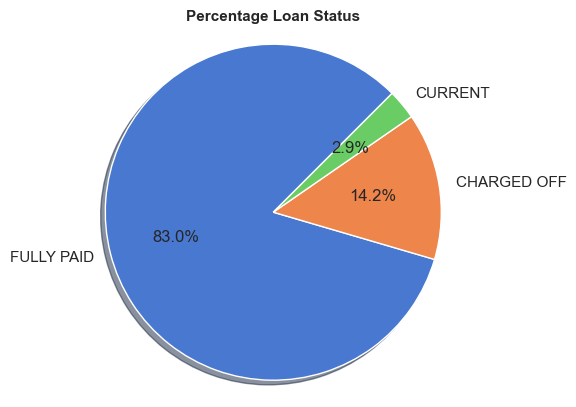

In [36]:
pie_chart(loan_status,'loan_status',"Percentage Loan Status")

- Above plot indicates out of 39717 loans granted to applicants 5627 loans were 'default' (charged off loans) and 1140 loans are 'current' (or payment active loans for which installments are getting paid).
- Above plot indicates the highest percentage customers are in 'fully paid' category i.e., who fully repay their loan (the principla and interest rate) - 83.%
- Approximately 14.2% of customers fall in the category of 'Charged Off' i.e., they don't pay their due in time or for a long period of time (defaulted).

### Analyse the Loan Term agsinst Default Loan Applications (Charged Off Loans)

In [37]:
default_term = pd.DataFrame(chargedoff_loan_df.term.value_counts())
default_term

,term
36 MONTHS,3227
60 MONTHS,2400


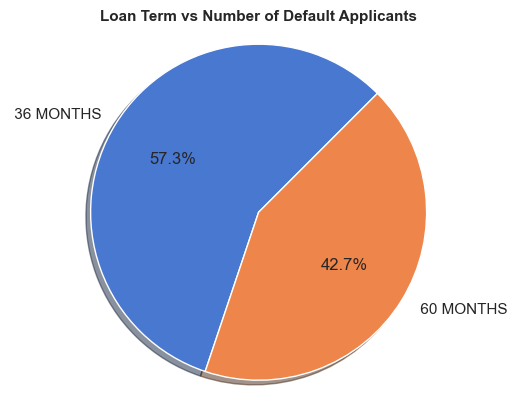

In [38]:
pie_chart(default_term,'term',"Loan Term vs Number of Default Applicants")

- Above Plot shows percentage default applicants are in category of payment terms in 36 months or 60 months.
- The percentage of 36 months category(57.3%) is higher than 60 months (42.7%) category.

### Analyse the LC- Assigned Grades versus Number of Default Applicants (Charged off Loans)

In [39]:
default_grade = chargedoff_loan_df.grade.value_counts().reset_index()
default_grade

,index,grade
0,B,1425
1,C,1347
2,D,1118
3,E,715
4,A,602
5,F,319
6,G,101


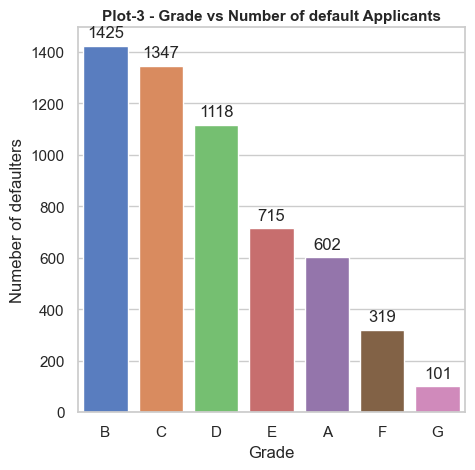

In [40]:
f, ax = plt.subplots(figsize=(5, 5))
ax = sns.barplot(x='index',y='grade',data=default_grade)
Title='Plot-3 - Grade vs Number of default Applicants'
ax.set_title(Title,fontdict={'fontsize':11,'fontweight':'bold'},loc='center',pad=5)
ax.set_xlabel("Grade")
ax.set_ylabel("Numeber of defaulters")

for p in ax.patches:
    height,width =p.get_height(),(p.get_x() + p.get_width() / 2.)
    if (~np.isnan(height)):
        ax.annotate('{:.0f}'.format(height),(width, height+50), ha='center', va='center')
        
plt.show();

- The Plot-3 shows the highest number 'default' (charged off) customers whose loans are under LC assigned grade 'B' (1425 defaulters) and followed by 'C' (1347 defaulters).

### Analyse the LC- Assigned sub Grades versus Number of Default Applicants (Charged off Loans).

In [41]:
default_subgrade = chargedoff_loan_df.sub_grade.value_counts().reset_index()
default_subgrade

,index,sub_grade
0,B5,356
1,B3,341
2,C1,336
3,B4,329
4,C2,321
5,D2,271
6,C3,270
7,D3,256
8,B2,228
9,A5,217


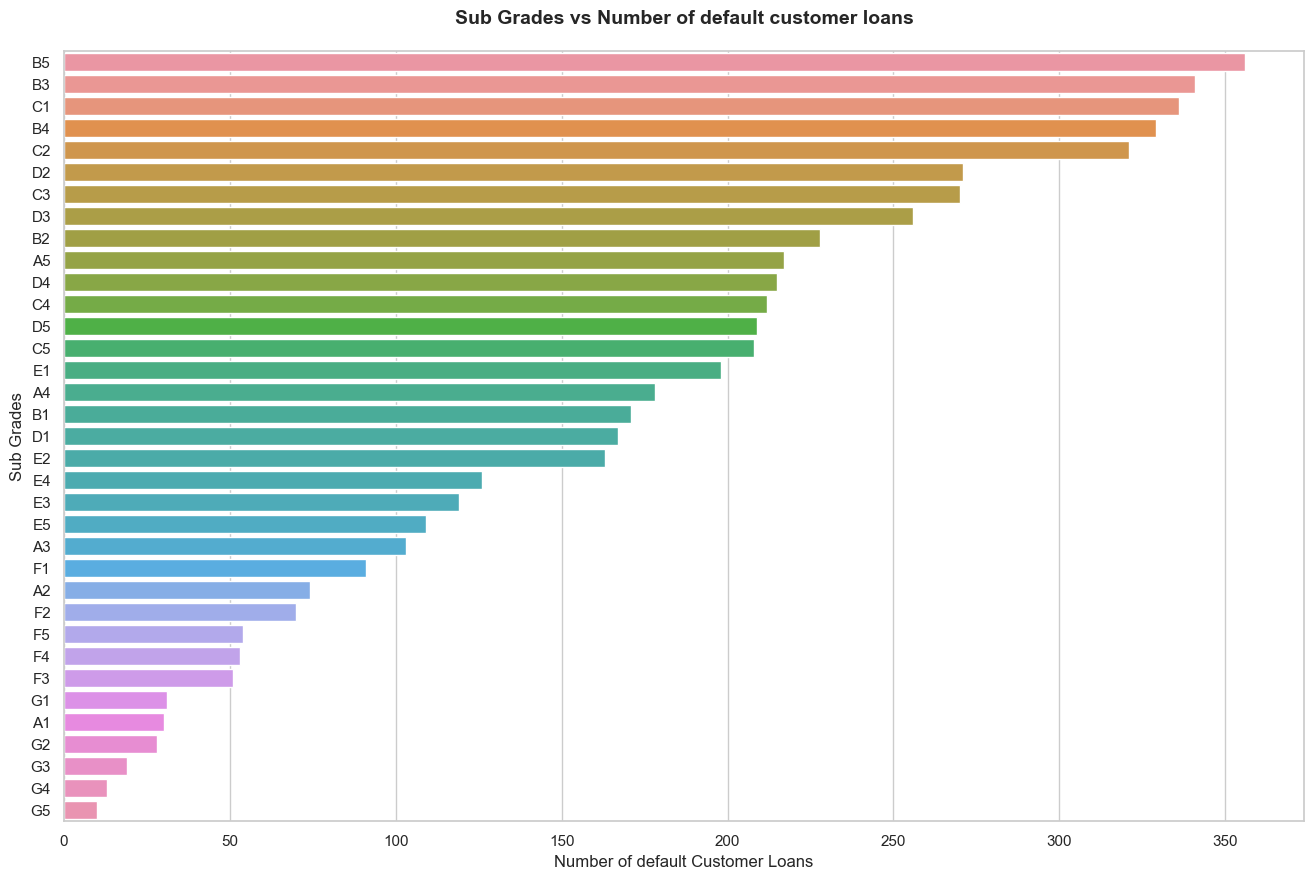

In [42]:
f, ax = plt.subplots(figsize=(16, 10))
ax = sns.barplot(x='sub_grade',y='index',orient='h',data=default_subgrade)
Title='Sub Grades vs Number of default customer loans'
ax.set_title(Title,fontdict={'fontsize':14,'fontweight':'bold'},loc='center',pad=20)
ax.set_xlabel("Number of default Customer Loans")
ax.set_ylabel("Sub Grades")
       
plt.show();

- Above plot shows the highest number 'default' (charged off) customers whose loans are under LC assigned sub grade 'B5' (356) and followed by 'B3' (341).

### Analyse the Employee Experience versus Number of Default Applicants (Charged off Loans)

In [43]:
default_emp_length =  chargedoff_loan_df.emp_length.value_counts().reset_index()
default_emp_length

,index,emp_length
0,10+ YEARS,1331
1,< 1 YEAR,639
2,2 YEARS,567
3,3 YEARS,555
4,4 YEARS,462
5,5 YEARS,458
6,1 YEAR,456
7,6 YEARS,307
8,7 YEARS,263
9,8 YEARS,203


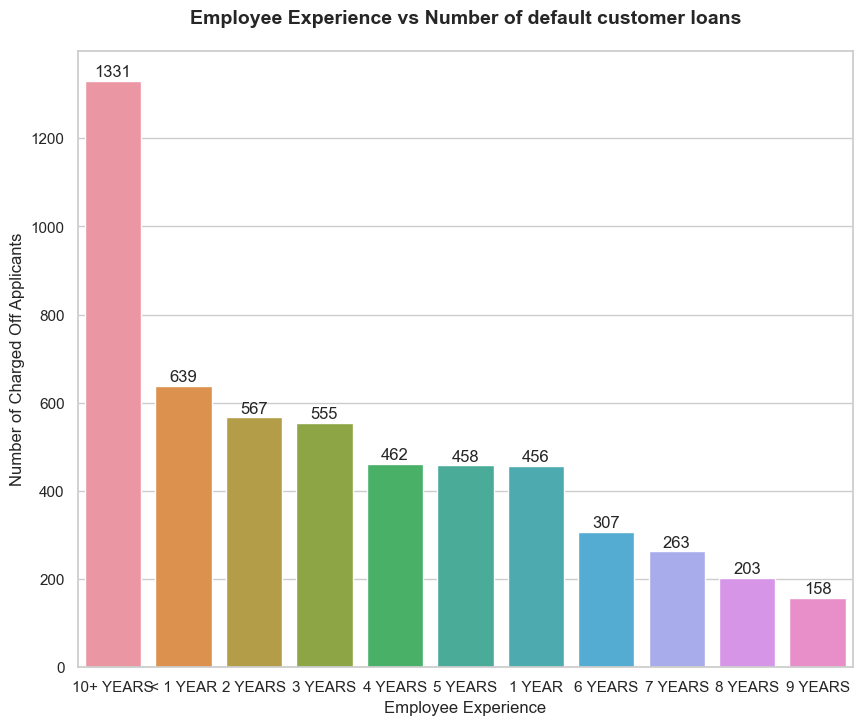

In [44]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.barplot(x='index',y='emp_length',data=default_emp_length)
Title='Employee Experience vs Number of default customer loans'
ax.set_title(Title,fontdict={'fontsize':14,'fontweight':'bold'},loc='center',pad=20)
ax.set_xlabel("Employee Experience")
ax.set_ylabel("Number of Charged Off Applicants")
#Annotations.
for p in ax.patches:
    height,width =p.get_height(),(p.get_x() + p.get_width() / 2.)
    if (~np.isnan(height)):
        ax.annotate('{:.0f}'.format(height),(width, height+20), ha='center', va='center')
        
plt.show();

- Above Plot indicate employees with experience in the range greater than 10+ years (1331) follwed by less than 1 years (639) are highest number of defaulters.

### Analyse the Home Ownership versus Number of Default Applicants (Charged off Loans).

In [45]:
default_home_ownership = chargedoff_loan_df.home_ownership.value_counts().reset_index()
default_home_ownership['percentage'] = 100 * (default_home_ownership.home_ownership/default_home_ownership.home_ownership.sum())
default_home_ownership

,index,home_ownership,percentage
0,RENT,2839,50.45
1,MORTGAGE,2327,41.35
2,OWN,443,7.87
3,OTHER,18,0.32


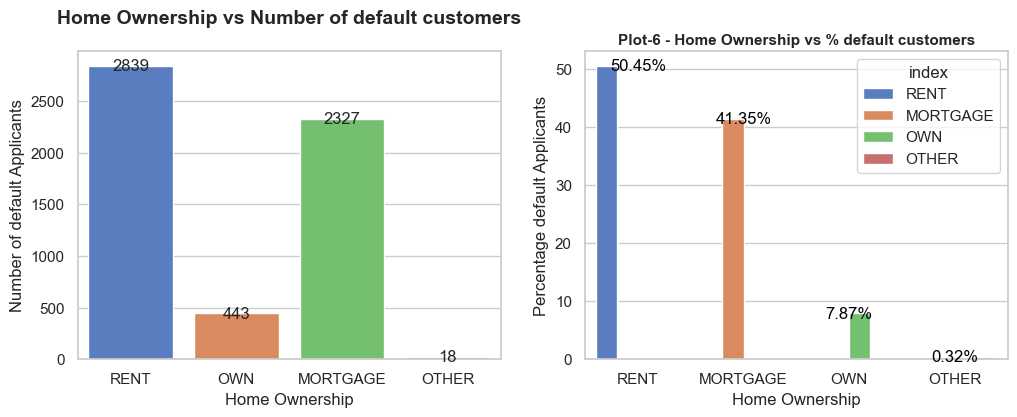

In [46]:
f, axarr = plt.subplots(1,2,figsize=(12,4))
ax1 = sns.countplot(x="home_ownership",\
                      data = chargedoff_loan_df,ax=axarr[0])
Title='Home Ownership vs Number of default customers'
ax1.set_title(Title,fontdict={'fontsize':14,'fontweight':'bold'},loc='center',pad=20)
ax1.set_xlabel("Home Ownership")
ax1.set_ylabel("Number of default Applicants")

for p in ax1.patches:
    height,width =p.get_height(),(p.get_x() + p.get_width() / 2.)
    if (~np.isnan(height)):
        ax1.annotate('{:.0f}'.format(height),(width, height),
                     ha='center', va='center')
        
ax2 = sns.barplot(x='index',y='percentage',hue='index',\
                   data=default_home_ownership,ax=axarr[1])
Title='Plot-6 - Home Ownership vs % default customers'
ax2.set_title(Title,fontdict={'fontsize':11,'fontweight':'bold'},loc='center',pad=5)
ax2.set_xlabel("Home Ownership")
ax2.set_ylabel("Percentage default Applicants")

for index,row in default_home_ownership.iterrows():
    ax2.text(x=row.name,y=row.percentage,s='{:}%'.format(round(row.percentage,2)), color='black',ha='center',va='center')
    
plt.show();    

- Above Plot indicate employees who are staying in RENT are the highest defaulters with high as 50% i.e., 2839 defaulters. out of 5627 applicants.
- So, it is clear that most defaulters have rented (50.45%) or mortaged (41.35%) homes.

### Analyse the Verification Status versus Number of Default Applicants (Charged off Loans).

In [47]:
chargedoff_loan_df.verification_status.value_counts()

NOT VERIFIED       2142
VERIFIED           2051
SOURCE VERIFIED    1434
Name: verification_status, dtype: int64

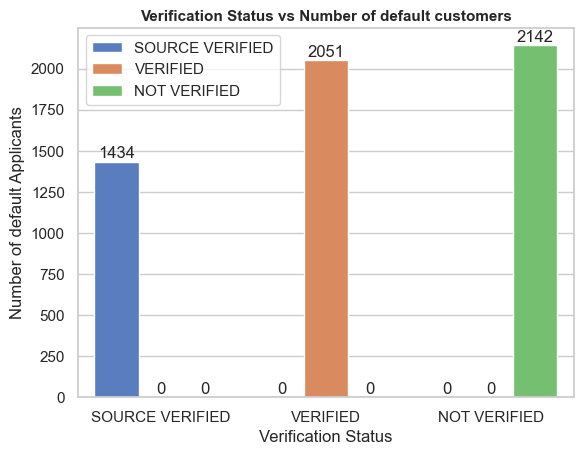

In [48]:
ax =sns.countplot(x="verification_status",hue = 'verification_status', data = chargedoff_loan_df,palette='muted')
Title='Verification Status vs Number of default customers'
ax.set_title(Title,fontdict={'fontsize':11,'fontweight':'bold'},loc='center',pad=5)
ax.set_xlabel("Verification Status")
ax.set_ylabel("Number of default Applicants")
ax.legend(loc=2)

for p in ax.patches:
    height,width =p.get_height(),(p.get_x() + p.get_width() / 2.)
    if (~np.isnan(height)):
        ax.annotate('{:.0f}'.format(height),(width, height+50), ha='center', va='center')
        
plt.show();

- It is very important to note, many applicants status are not verified by the bank, before lending to the 'high risky applicants'.
- The number of not verified cases are 2142.

### Analyse Purpose versus Number of Default Applicants

In [49]:
chargedoff_loan_df.purpose.value_counts()

DEBT_CONSOLIDATION    2767
OTHER                  633
CREDIT_CARD            542
SMALL_BUSINESS         475
HOME_IMPROVEMENT       347
MAJOR_PURCHASE         222
CAR                    160
MEDICAL                106
WEDDING                 96
MOVING                  92
HOUSE                   59
EDUCATIONAL             56
VACATION                53
RENEWABLE_ENERGY        19
Name: purpose, dtype: int64

- It is clear, the highest number of defaulted application are against the debt_consolidation purpose - 2767.

### Analyse Resident State against Number of Default Applicants

In [50]:
chargedoff_loan_df['addr_state'].value_counts()

CA    1125
FL     504
NY     495
TX     316
NJ     278
GA     215
IL     197
PA     180
VA     177
MD     162
MA     159
OH     155
WA     127
AZ     123
NC     114
MO     114
NV     108
MI     103
CO      98
CT      94
MN      81
OR      71
SC      66
WI      63
AL      54
LA      53
KY      45
OK      40
UT      40
KS      31
NM      30
HI      28
AR      27
NH      25
RI      25
WV      21
DC      15
AK      15
DE      12
SD      12
MT      11
VT       6
WY       4
NE       3
MS       2
TN       2
ID       1
Name: addr_state, dtype: int64

In [51]:
chargedoff_loan_df['addr_state'].value_counts().nlargest(5)

CA    1125
FL     504
NY     495
TX     316
NJ     278
Name: addr_state, dtype: int64

In [52]:
chargedoff_loan_df['addr_state'].value_counts().nlargest(5).sum()/ 5627

0.4830282566198685

- Five states CA, FL, NY, TX, NJ contributed to 48% of loans

### Analyse Resident State against Segmented All Loan Status (Charged off , Fully Paid and Current Loans)

In [53]:
df_addr_state = df.groupby(['loan_status','addr_state'])['id'].count().unstack('loan_status')

In [54]:
df_addr_state = df_addr_state.sort_values(by='FULLY PAID', ascending=False)

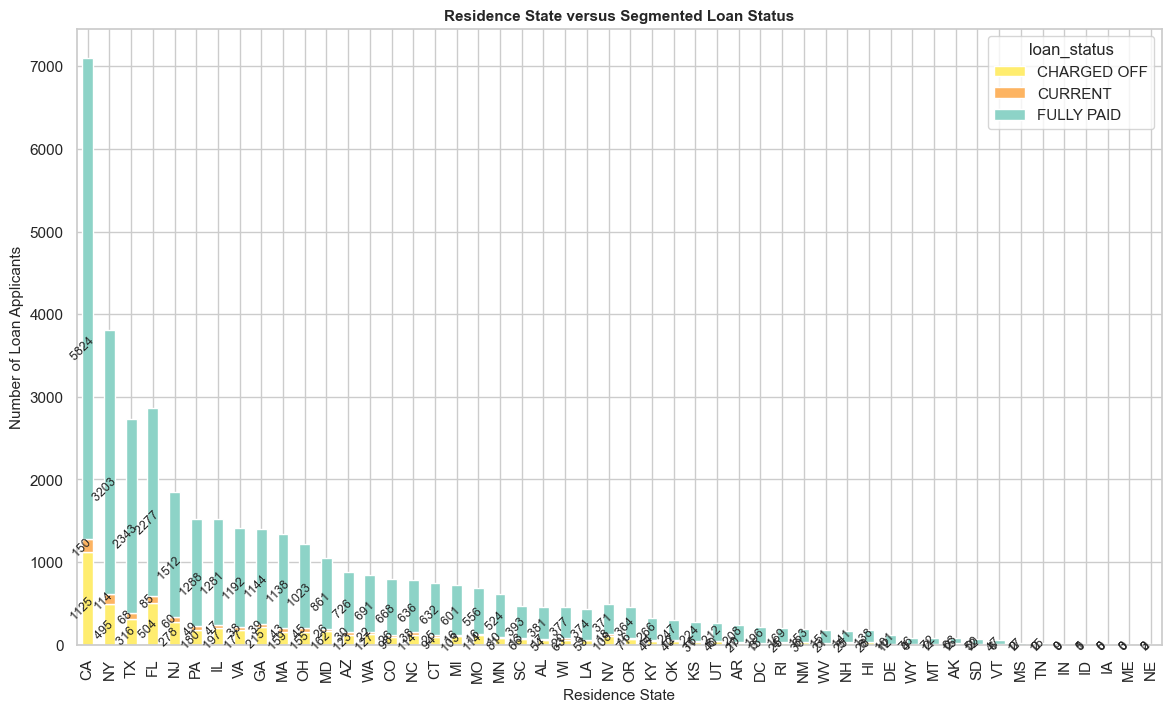

In [55]:
ax = df_addr_state.plot(kind='bar',
             stacked=True,
             grid=True,
             figsize=(14,8),
             colormap=plt.cm.Set3_r,
             fontsize=11)

titlefonts = {'fontsize':11,'fontweight':'bold'}
ax.set_title("Residence State versus Segmented Loan Status", fontdict=titlefonts)

fonts= {'fontsize':11}
ax.set_ylabel("Number of Loan Applicants",fontsize=11)
ax.set_xlabel("Residence State",fontdict=fonts)
ax.get_legend().set_bbox_to_anchor((1.0, 1.0))


# Annotate the stacked bar plot

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    label = ax.annotate('{:.0f} '.format(height), 
                (p.get_x()+.15*width, 
                 p.get_y()+.4*height),
                 rotation=45,ha='center',va='center',)
    label.set_fontsize(9)

# Display the Stacked Bar Plot.
plt.show();

- It is clear, CA (California) State has most number of cases of defaulted loans -1125 of all loans which is 16% of the total loan Applicants in CA.

### Distribution of Continuous Numeric Variables

In [56]:
perc =[.20,.25, .40, .60, .75,.80,.90,.95] 
df_filtered.loan_amnt.describe(percentiles=perc)

count   38,577.00
mean    11,047.03
std      7,348.44
min        500.00
20%      5,000.00
25%      5,300.00
40%      7,750.00
50%      9,600.00
60%     11,200.00
75%     15,000.00
80%     16,000.00
90%     21,600.00
95%     25,000.00
max     35,000.00
Name: loan_amnt, dtype: float64

- The mean of \\$11,047.03 and  25% and 75% quartiles of \\$5,300.00 and \\$15,000.00 respectively.

### Funded Amount Analysis

In [57]:
perc =[.20,.25, .40, .60,.75, .80,.90,.95] 
df_filtered.funded_amnt.describe(percentiles=perc)

count   38,577.00
mean    10,784.06
std      7,090.31
min        500.00
20%      5,000.00
25%      5,200.00
40%      7,500.00
50%      9,550.00
60%     10,875.00
75%     15,000.00
80%     16,000.00
90%     20,000.00
95%     25,000.00
max     35,000.00
Name: funded_amnt, dtype: float64

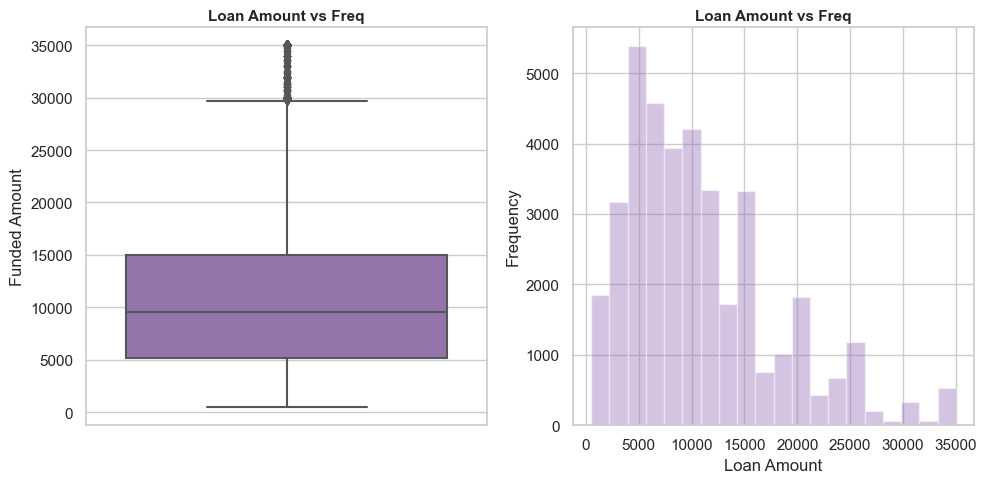

In [58]:
f, axn = plt.subplots(1,2,figsize=(10,5))
Title = "Loan Amount vs Freq"
ax1 = sns.boxplot(y=df_filtered.funded_amnt,ax=axn[0],color='m')
ax1.set_title(Title,fontdict={'fontsize':11,'fontweight':'bold'},loc='center',pad=5)
ax1.set_ylabel("Funded Amount")

ax2 = sns.distplot(df_filtered.funded_amnt,bins=20,
                   rug=False,
                   kde=False,
                   color='m',
                   ax=axn[1])

ax2.set_xlabel("Loan Amount")
ax2.set_ylabel("Frequency")
ax2.set_title(Title,fontdict={'fontsize':11,'fontweight':'bold'},loc='center',pad=5)
plt.tight_layout()
plt.show();

- Plot shows distribution of funded amount across loan applicants. It has almost normal distribution with mean of \\$10,784.06 and 25% and 75% quartiles of \\$5,200.00 and \\$15,000.00 respectively.

### Interest Rate Analysis

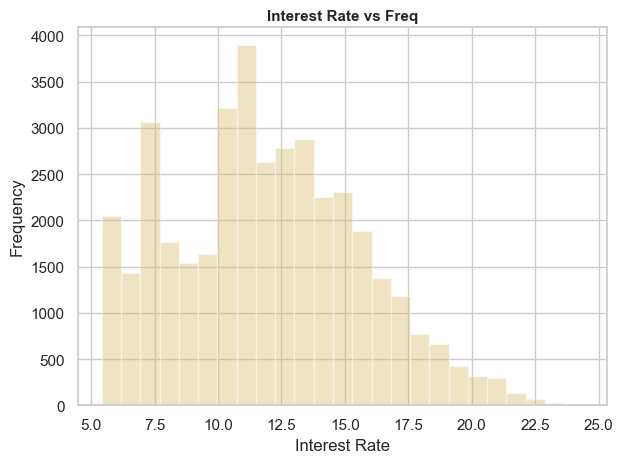

In [59]:
fig,ax = plt.subplots()
sns.distplot(df_filtered.int_rate,bins=25,rug=False,kde=False,color='y', ax=ax)

ax.set_xlabel("Interest Rate")
ax.set_ylabel("Frequency")
Title = "Interest Rate vs Freq"

ax.set_title(Title,fontdict={'fontsize':11,'fontweight':'bold'},loc='center',pad=5)

plt.tight_layout()
plt.show();

-  From the avobe histogram the distribution, we can see that the number of loans for interest rate spikes between 7-8% and again between 11-13%.

### Loan Installment Analysis

In [60]:
perc =[.20, .25,.40, .60,.75, .80,.90,.95] 
df_filtered.installment.describe(percentiles=perc)

count   38,577.00
mean       322.47
std        208.64
min         15.69
20%        149.92
25%        165.74
40%        228.71
50%        277.86
60%        327.96
75%        425.55
80%        480.33
90%        620.90
95%        760.82
max      1,305.19
Name: installment, dtype: float64

We can see the 95% is 763 but the max value is 1305.19 and so we can eliminate those outlier for the bins.

In [61]:
loan_inst_subset = df_filtered.loc[df_filtered.installment <=800,:]

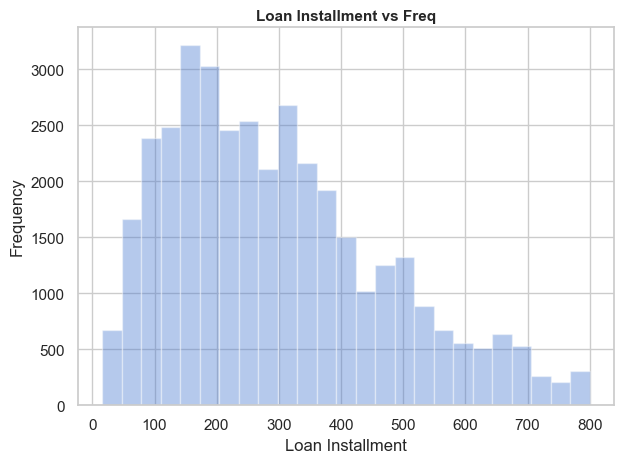

In [62]:
fig,ax = plt.subplots()
ax = sns.distplot(loan_inst_subset.installment,bins=25,
                   rug=False,
                   kde=False,
                   color='b',
                   ax=ax)


ax.set_xlabel("Loan Installment")
ax.set_ylabel("Frequency")
Title = "Loan Installment vs Freq"
ax.set_title(Title,fontdict={'fontsize':11,'fontweight':'bold'},loc='center',pad=5)

plt.tight_layout()
plt.show();

- Using the 95% rule we eliminate the outliers and set the upper bound to \\$800. In the histogram, we see 70% all monthly installments are below \\$400.

### Annual Income Analysis

In [63]:
perc =[.05,.95] 
df_filtered.annual_inc.describe(percentiles=perc)

count      38,577.00
mean       68,777.97
std        64,218.68
min         4,000.00
5%         24,000.00
50%        58,868.00
95%       140,004.00
max     6,000,000.00
Name: annual_inc, dtype: float64

In [64]:
loan_annual_inc = df_filtered.loc[((df_filtered.annual_inc<=140004) & (df_filtered.annual_inc>=24000)),:]

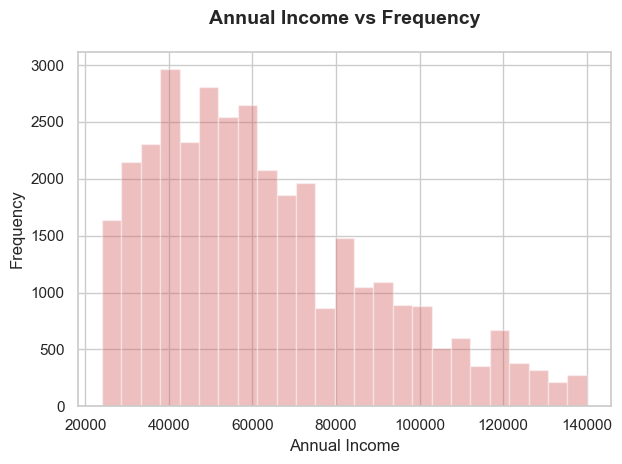

In [65]:
fig,ax = plt.subplots()
ax = sns.distplot(loan_annual_inc.annual_inc,bins=25,
                   rug=False,
                   kde=False,
                   color='r',
                   ax=ax)
ax.set_xlabel("Annual Income")
ax.set_ylabel("Frequency")
Title = "Annual Income vs Frequency"
ax.set_title(Title,fontdict={'fontsize':14,'fontweight':'bold'},loc='center',pad=20)

plt.tight_layout()
plt.show();

- Using 5% and 95% rule, the outliers are eliminated.
- In the binned histogram, we see majority are between \\$40,000 and \\$80,000 annual income category.

### Debt To Interest Ratio Analysis

In [66]:
perc =[.05, .1, .15, .20, .40, .60,.70,.80,.90,.95] 
df_filtered.dti.describe(percentiles=perc)

count   38,577.00
mean        13.27
std          6.67
min          0.00
5%           2.10
10%          4.06
15%          5.55
20%          6.91
40%         11.35
50%         13.37
60%         15.31
70%         17.43
80%         19.71
90%         22.29
95%         23.80
max         29.99
Name: dti, dtype: float64

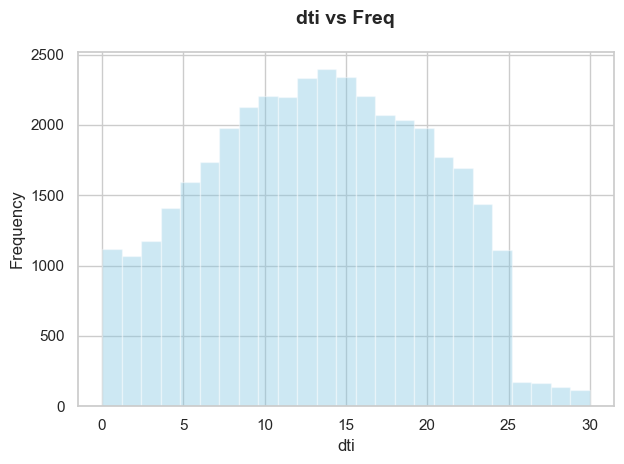

In [67]:
fig,ax = plt.subplots()
ax = sns.distplot(df_filtered.dti,bins=25,
                   rug=False,
                   kde=False,
                   color='c',
                   ax=ax)
ax.set_xlabel("dti")
ax.set_ylabel("Frequency")
Title = "dti vs Freq"
ax.set_title(Title,fontdict={'fontsize':14,'fontweight':'bold'},loc='center',pad=20)

plt.tight_layout()
plt.show();

- the distribution is normally distributed and the majority in the range of 13%-15% dti ratio.

### Loan Issue Date (Year) Analysis

In [68]:
loan_issue_year = pd.DataFrame(df_filtered.issue_d.dt.year)

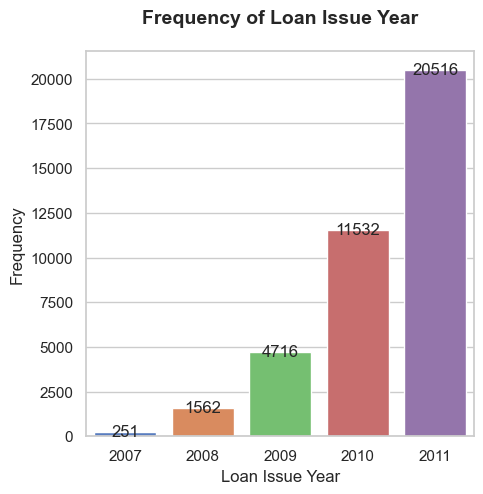

In [69]:
f, ax = plt.subplots(figsize=(5,5))
ax =sns.countplot(x="issue_d",data = loan_issue_year,palette='muted')
Title='Frequency of Loan Issue Year'
ax.set_title(Title,fontdict={'fontsize':14,'fontweight':'bold'},loc='center',pad=20)
ax.set_xlabel("Loan Issue Year")
ax.set_ylabel("Frequency")
for p in ax.patches:
    height,width =p.get_height(),p.get_x()
    if (~np.isnan(height)):
        ax.annotate("{:.0f}".format(height), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center') 
               
plt.show();

- Shows the majority of the loans were issued during year 2011.
- The number of loans issued during 2011 is 20516

### LC pulled credit year for the loan Analysis

In [70]:
loan_credit_pull_year = pd.DataFrame(df_filtered.last_credit_pull_d.dt.year)
loan_credit_pull_year = loan_credit_pull_year.last_credit_pull_d.fillna(0).astype(int).reset_index()

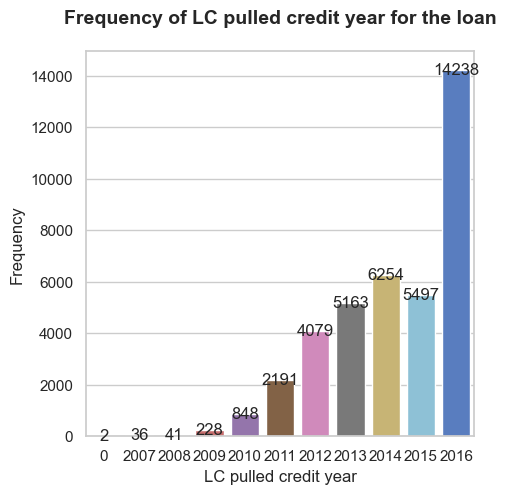

In [71]:
f, ax = plt.subplots(figsize=(5,5))
ax =sns.countplot(x="last_credit_pull_d",data = loan_credit_pull_year,palette='muted')
Title='Frequency of LC pulled credit year for the loan'
ax.set_title(Title,fontdict={'fontsize':14,'fontweight':'bold'},loc='center',pad=20)
ax.set_xlabel("LC pulled credit year")
ax.set_ylabel("Frequency")

for p in ax.patches:
    height,width =p.get_height(),p.get_x()
    if (~np.isnan(height)):
        ax.annotate("{:.0f}".format(height), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center')
               
plt.show();

- Shows the majority of the loans were pulled credit for the loans in the year 2011.
- The number of pulled credit for the loans during 2011 is 14328

### Last Credit Payment Year Analysis for the loan Analysis

In [72]:
last_credit_pymnt_year = pd.DataFrame(df_filtered.last_pymnt_d.dt.year)
last_credit_pymnt_year = last_credit_pymnt_year.last_pymnt_d.fillna(0).astype(int).reset_index()

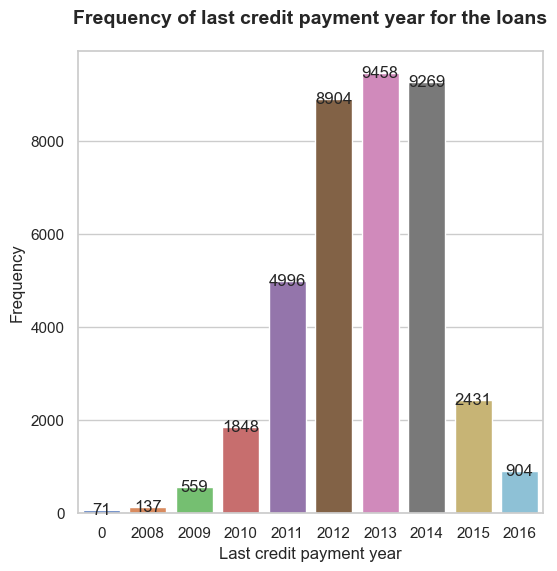

In [73]:
f, ax = plt.subplots(figsize=(6,6))
ax =sns.countplot(x="last_pymnt_d",data = last_credit_pymnt_year,palette='muted')
Title='Frequency of last credit payment year for the loans'
ax.set_title(Title,fontdict={'fontsize':14,'fontweight':'bold'},loc='center',pad=20)
ax.set_xlabel("Last credit payment year")
ax.set_ylabel("Frequency")

for p in ax.patches:
    height,width =p.get_height(),p.get_x()
    if (~np.isnan(height)):
        ax.annotate("{:.0f}".format(height), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center')               
plt.show();

- Shows the highest number credit payment happend for the loans during the year 2013.
- The number of credit payments for the loans during 2013 is 9458

### Total Credit Revolving Balance Analysis

In [74]:
perc =[.05, .1, .15, .20, .40, .60,.70,.80,.90,.95] 
df_filtered.revol_bal.describe(percentiles=perc)

count    38,577.00
mean     13,289.49
std      15,866.49
min           0.00
5%          312.00
10%       1,099.00
15%       1,945.00
20%       2,787.00
40%       6,528.00
50%       8,762.00
60%      11,391.60
70%      14,729.40
80%      19,617.00
90%      28,972.00
95%      41,356.20
max     149,588.00
Name: revol_bal, dtype: float64

We can see the 95% is 41,536 but the max value is 149,588.00 and so we can eliminate 
those outlier for the bins considering 95% percentile.


In [75]:
total_credit_revol_bal = df_filtered.loc[df_filtered.revol_bal <=41536,:]

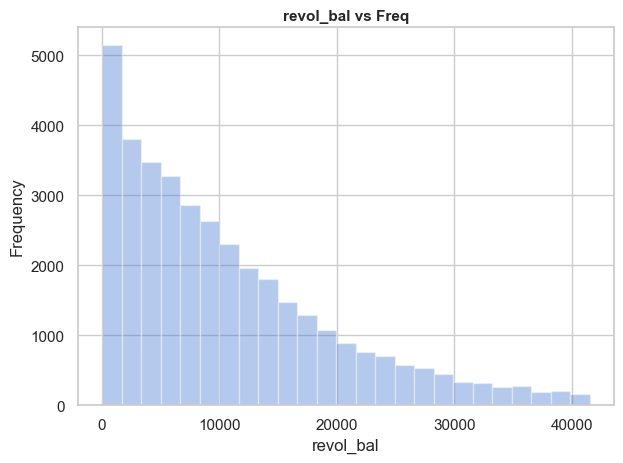

In [76]:
fig,ax = plt.subplots()
ax = sns.distplot(total_credit_revol_bal.revol_bal,bins=25,
                   rug=False,
                   kde=False,
                   color='b',
                   ax=ax)
ax.set_xlabel("revol_bal")
ax.set_ylabel("Frequency")
Title = "revol_bal vs Freq"
ax.set_title(Title,fontdict={'fontsize':11,'fontweight':'bold'},loc='center',pad=5)

plt.tight_layout()
plt.show();

## <a id='Bivariate_Analysis'>Bivariate Analysis</a>

In [77]:
# Genric Functions for annotations.
def annotations(ax,textoffset,raxis):
    for p in ax.patches:
        height,width =p.get_height(),p.get_x()
        if (~np.isnan(height)):
            ax.annotate("{:.0f}".format(height), 
                       (p.get_x() + p.get_width() / 2.,
                        p.get_height()),
                        ha='center', va='center', rotation=raxis, 
                        xytext=(0, textoffset), textcoords='offset points') 

### Analaysis of Home Ownership and verified status for the defaulted Loans.

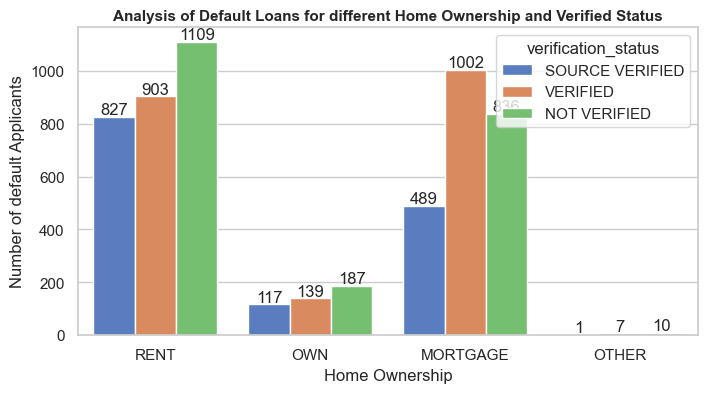

In [78]:
f, ax = plt.subplots(figsize=(8, 4))
ax =sns.countplot(x="home_ownership",hue='verification_status',data = chargedoff_loan_df,palette='muted')
Title='Analysis of Default Loans for different Home Ownership and Verified Status'
ax.set_title(Title,fontdict={'fontsize':11,'fontweight':'bold'},loc='center',pad=5)
ax.set_xlabel("Home Ownership")
ax.set_ylabel("Number of default Applicants")
annotations(ax,5,0)       
plt.show();

- The majority defaulters in the in the RENT category.
- In that, around 1109 cases in which source was not verified indicating the huge risk.

### Analysis of Annual Income Group against the Number of Default Loans

Splitting the annual income of the applicants into specific income zone.

In [79]:
chargedoff_loan_df = chargedoff_loan_df.assign(range=pd.cut(df_filtered['annual_inc'],\
                    [0,5000,15000,30000,60000,80000,120000,200000,500000,1250000],
                    labels=['Least income','Less Income','low_average','average','upper_average',\
                            'high','higher','upperhigher','highest'] ))

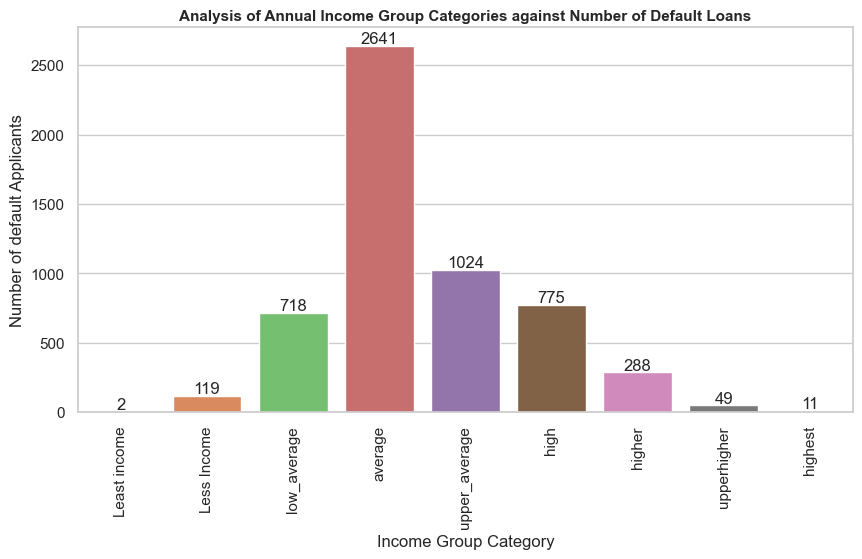

In [80]:
f, ax = plt.subplots(figsize=(10, 5))
ax =sns.countplot(x="range",data = chargedoff_loan_df,palette='muted')
Title='Analysis of Annual Income Group Categories against Number of Default Loans'
ax.set_title(Title,fontdict={'fontsize':11,'fontweight':'bold'},loc='center',pad=5)
ax.set_xlabel("Income Group Category")
ax.set_ylabel("Number of default Applicants")

for item in ax.get_xticklabels():
    item.set_rotation(90)

annotations(ax,5,0)
plt.show();


- Maximum defaulters are in annual income range of 30000 - 60000.

### Analysis of Annual Income Group for the term against Number of default Loans

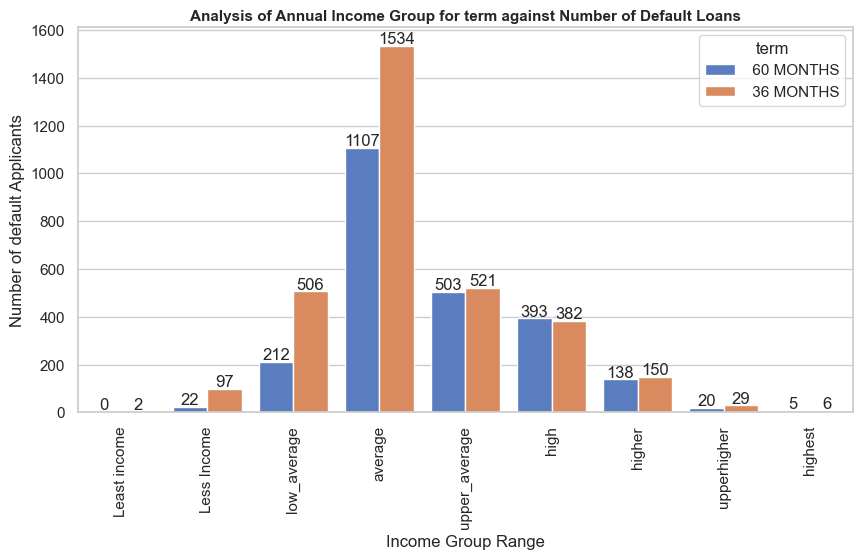

In [81]:
f, ax = plt.subplots(figsize=(10, 5))
ax =sns.countplot(x="range",hue='term',data = chargedoff_loan_df,palette='muted')
Title='Analysis of Annual Income Group for term against Number of Default Loans'
ax.set_title(Title,fontdict={'fontsize':11,'fontweight':'bold'},loc='center',pad=5)
ax.set_xlabel("Income Group Range")
ax.set_ylabel("Number of default Applicants")

for item in ax.get_xticklabels():
    item.set_rotation(90)

annotations(ax,5,0)
plt.show();

- Maximum defaulters in the term of 36 and 60 months are in the annual income range of `30000 - 60000`.

### Analysis of Annual Income Group for the Verification Status against Number of default Loans

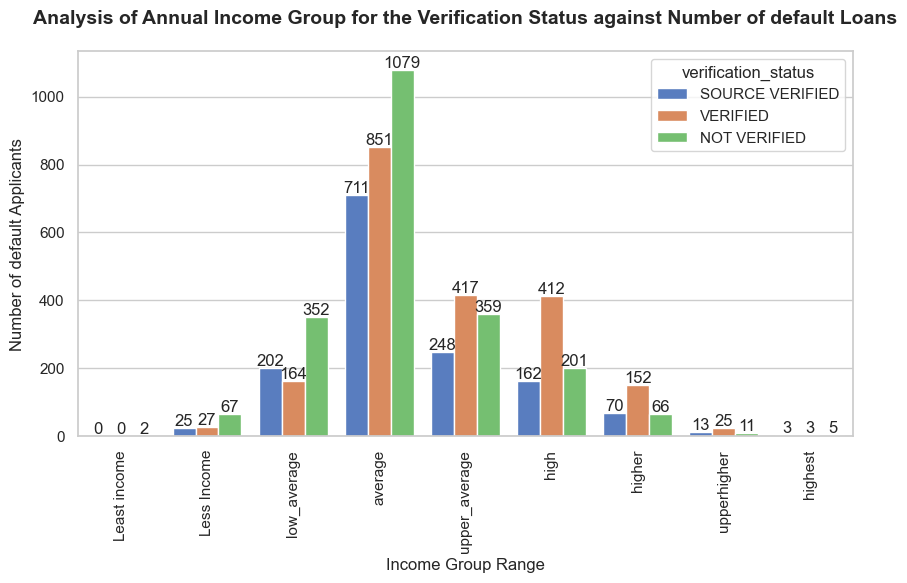

In [82]:
f, ax = plt.subplots(figsize=(10, 5))
ax =sns.countplot(x="range",hue='verification_status',data = chargedoff_loan_df,palette='muted')
Title='Analysis of Annual Income Group for the Verification Status against Number of default Loans'
ax.set_title(Title,fontdict={'fontsize':14,'fontweight':'bold'},loc='center',pad=20)
ax.set_xlabel("Income Group Range")
ax.set_ylabel("Number of default Applicants")

for item in ax.get_xticklabels():
    item.set_rotation(90)

annotations(ax,5,0)             
plt.show();

- Maximum defaulters are either not verified in the annual income range of 30000 - 60000.
- This is a huge risk.

### Analysis of Interest Rate Bin Category versus Term loans for default loans.

With just int_rate value as such its not helpful..so we need to create a new column 'int_category' based on int_rate , have classified as 5-10 as 'Low', 10-18 as 'Medium'and more than 18 as 'High'

In [83]:
chargedoff_loan_df = chargedoff_loan_df.assign( 
    int_category = pd.cut(
        chargedoff_loan_df.int_rate,
        [-1, 10, 18, 25],
        labels=['Low', 'Medium', 'High']))

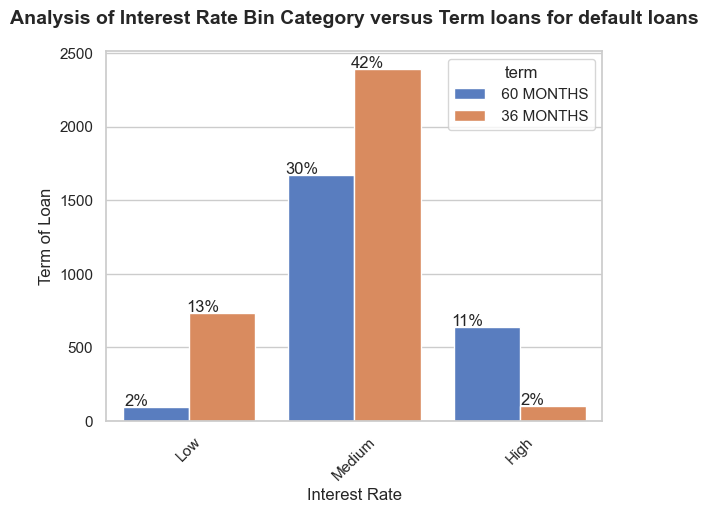

In [84]:
ax =sns.countplot(x="int_category",hue='term',data = chargedoff_loan_df,palette='muted')
Title='Analysis of Interest Rate Bin Category versus Term loans for default loans'
ax.set_title(Title,fontdict={'fontsize':14,'fontweight':'bold'},loc='center',pad=20)
ax.set_xlabel("Interest Rate")
ax.set_ylabel("Term of Loan")
for item in ax.get_xticklabels():
    item.set_rotation(45)

total = float(len(chargedoff_loan_df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+ p.get_width()/5.,
            height + 9,
            '{0:.0%}'.format(height/total),
            ha="center") 
plt.show();

- Maximum defaulters are in Medium Interest rate i.e. between 10 to 18%.
- Out of 72% , 42% have taken loan term as 36 Months and 30% as 60 Months.

### Analysis of Interest Rate bin category versus Employee experience for default loans.

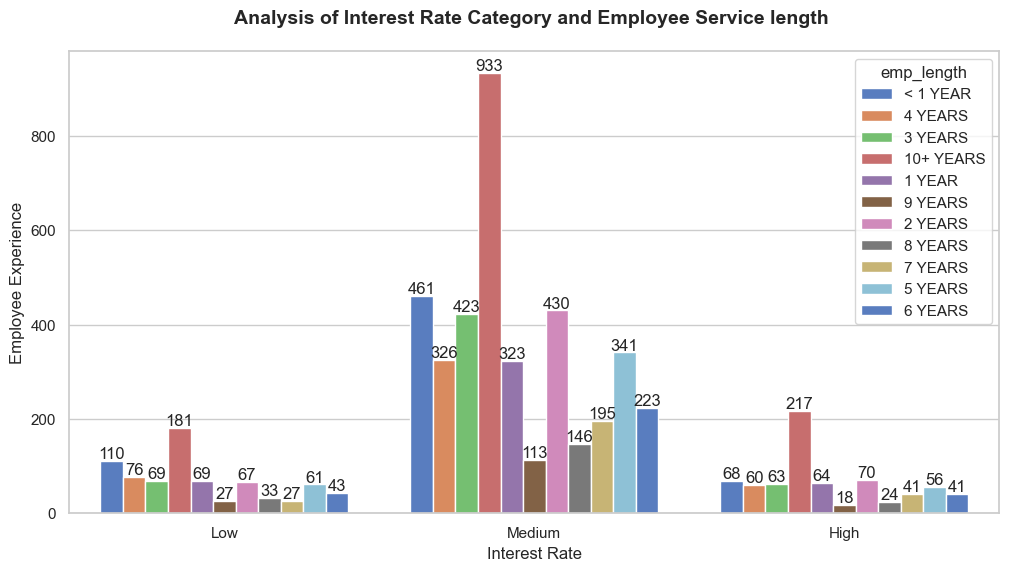

In [85]:
plt.figure(figsize=(12, 6))
ax =sns.countplot(x="int_category",hue='emp_length',data = chargedoff_loan_df,palette='muted')
Title='Analysis of Interest Rate Category and Employee Service length '
ax.set_title(Title,fontdict={'fontsize':14,'fontweight':'bold'},loc='center',pad=20)
ax.set_xlabel("Interest Rate")
ax.set_ylabel("Employee Experience")

#Annotations.
annotations(ax,5,0)
              
plt.show(); 


- Employees having service more than 10+ years have taken the Most Medium Interest rate Loans

### Bivariate Correlation Analysis.

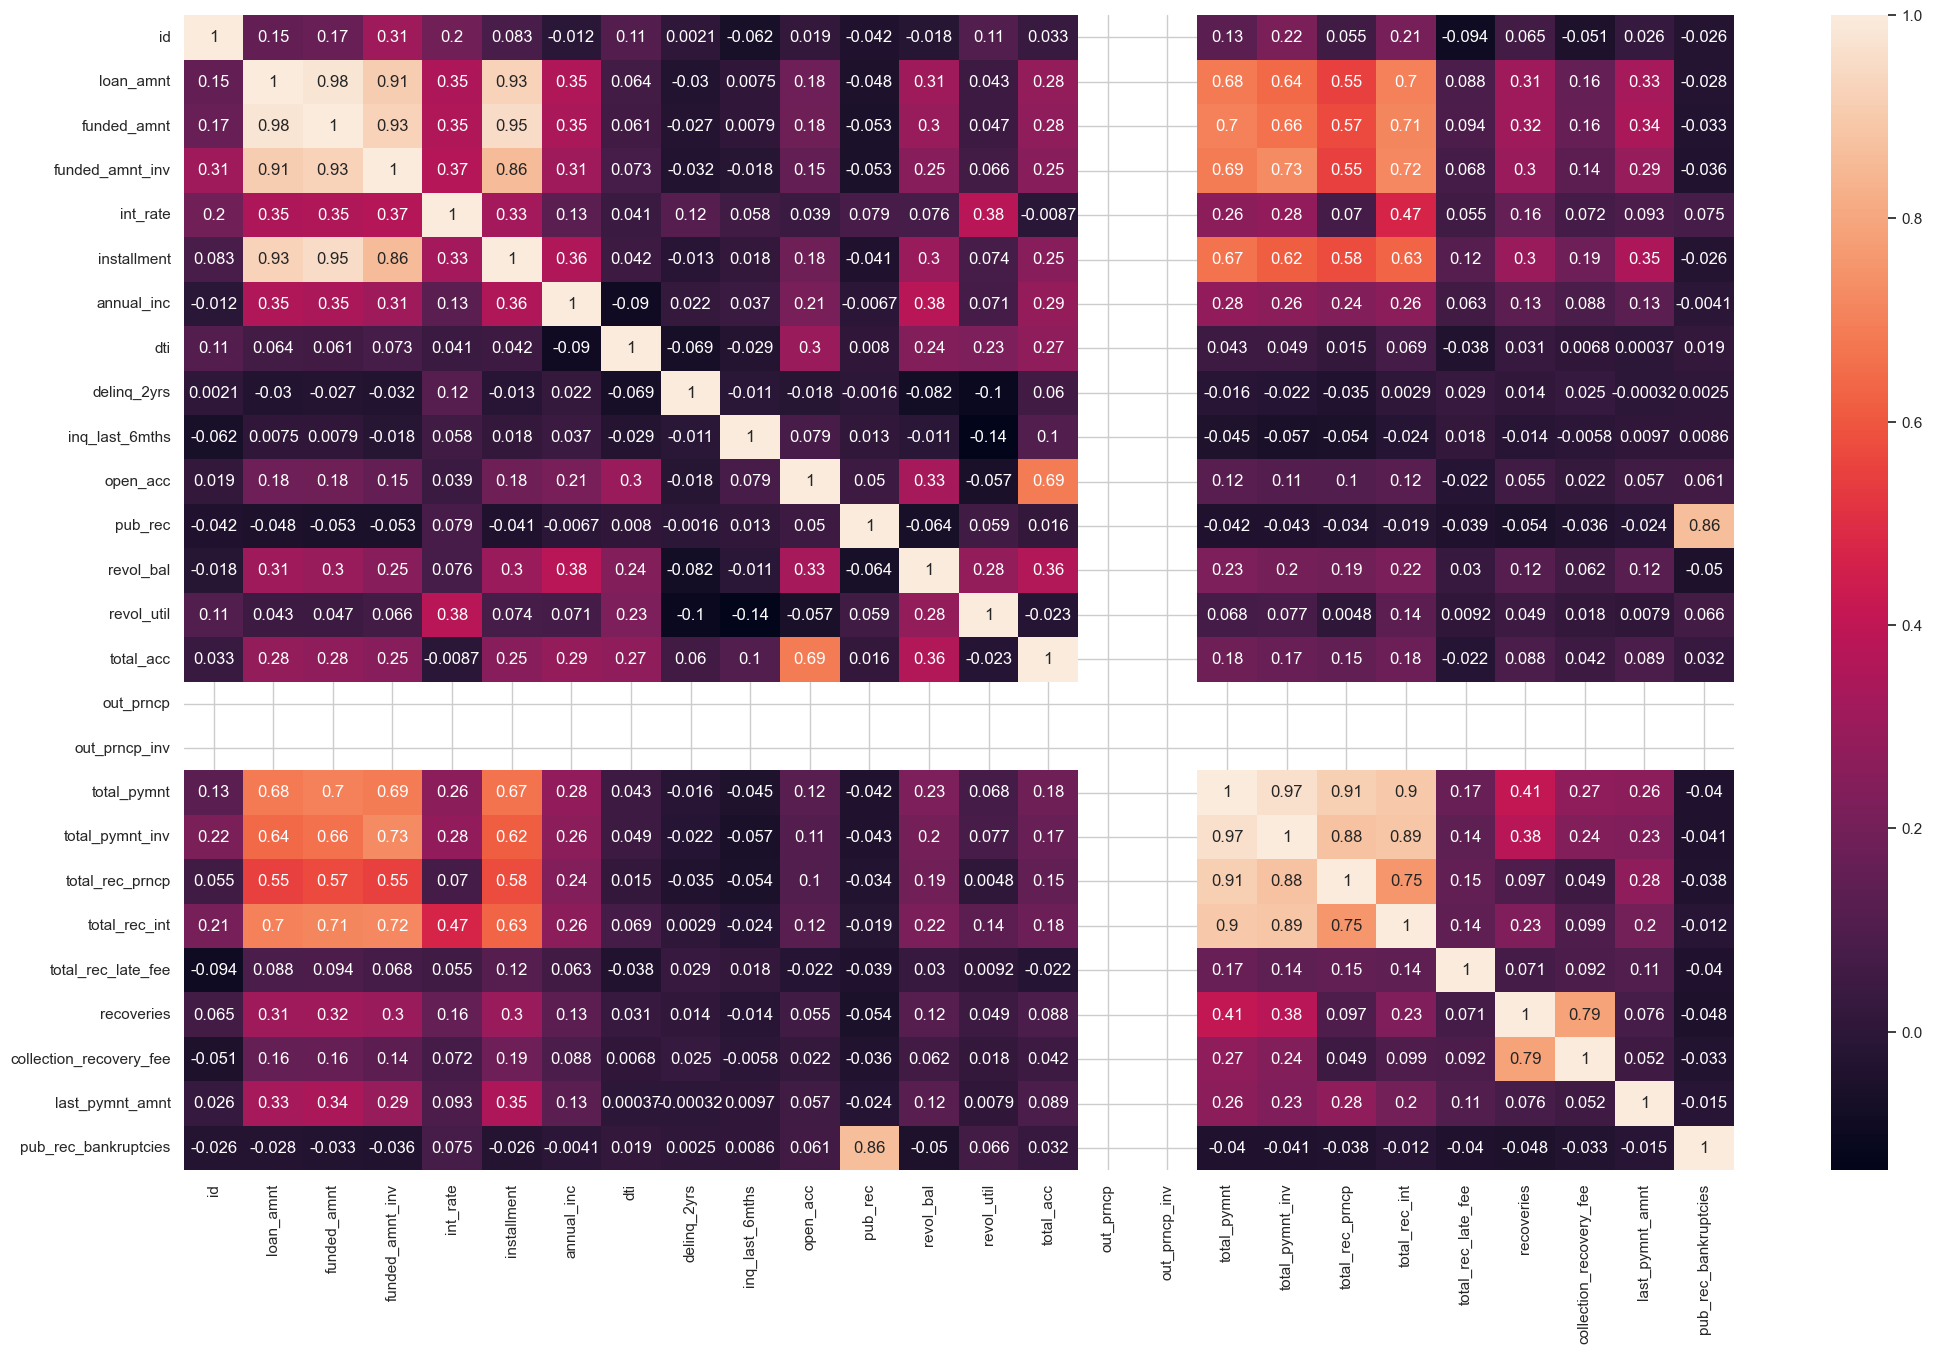

In [86]:
plt.figure(figsize=(25, 15))

chargedoff_loan_corr = chargedoff_loan_df.corr()
sns.heatmap(chargedoff_loan_corr, 
            xticklabels = chargedoff_loan_corr.columns.values,
            yticklabels = chargedoff_loan_corr.columns.values,
            annot = True);


From the heat map have picked the Topmost Correlated Variables
- Loan Amount , Funded Amount
- Instalment, Funded Amount Invested
- Total Payment, Total Payment Invested
- pub_rec,pub_rec_bankruptcies

### Loan Amount against Funded Amount for the purpose of the charged off Loans.

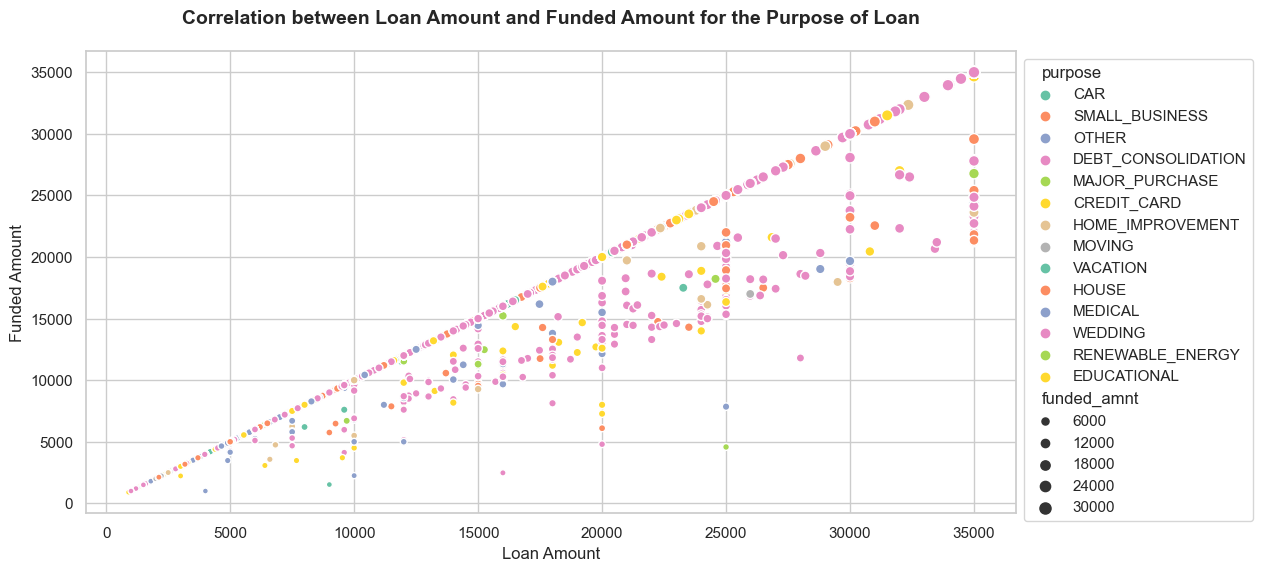

In [87]:
plt.figure(figsize=(12,6))
ax = sns.scatterplot(x="loan_amnt", y="funded_amnt",hue='purpose',size='funded_amnt',palette='Set2',
                     linewidth=1,data=chargedoff_loan_df)
ax.get_legend().set_bbox_to_anchor((1.0, 1.0))

Title='Correlation between Loan Amount and Funded Amount for the Purpose of Loan'
ax.set_title(Title,fontdict={'fontsize':14,'fontweight':'bold'},loc='center',pad=20)
ax.set_xlabel("Loan Amount")
ax.set_ylabel("Funded Amount")

plt.show();

Above Plot shows ;
- Positive correlation between loan_amnt and funded amount and it is linear.
- It clearly shows that with Increase in Loan Amount the funded amount increases
- Maximum funded Amount is for Debt Consolidation indicated by circle marked larger and Pink color.

### Correlation Analysis - Funded Amount Invested against Installments for a Purpose of Loan

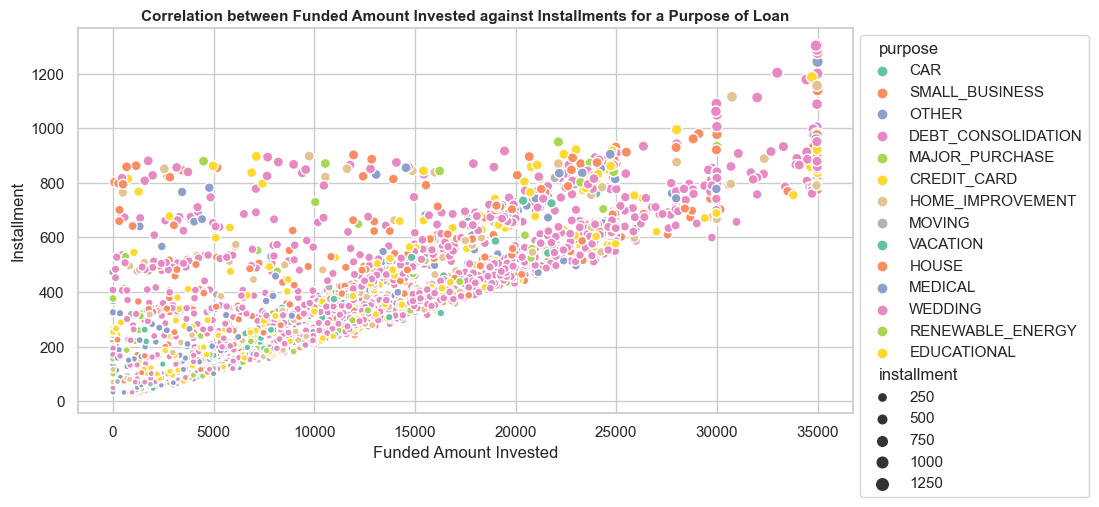

In [88]:
plt.figure(figsize=(10,5))
ax = sns.scatterplot(x="funded_amnt_inv", y="installment",hue='purpose',size='installment',palette='Set2',
                     linewidth=1,data=chargedoff_loan_df)
ax.get_legend().set_bbox_to_anchor((1.0, 1.0))

Title='Correlation between Funded Amount Invested against Installments for a Purpose of Loan'
ax.set_title(Title,fontdict={'fontsize':11,'fontweight':'bold'},loc='center',pad=5)
ax.set_xlabel('Funded Amount Invested')
ax.set_ylabel('Installment')

plt.show();

Above plot shows ;
- A positive correlation between funded amount and installment
- It clearly shows that with Increase in the Funded amount invested the installment increase
- The correlation between funded_amnt_inv and installment is `0.86'
- Higher installmens for debt consolidation and credit card repay purposes.

### Correlation Analysis - Total loan payment against total loan payment invested for a purpose for a Purpose of Loan

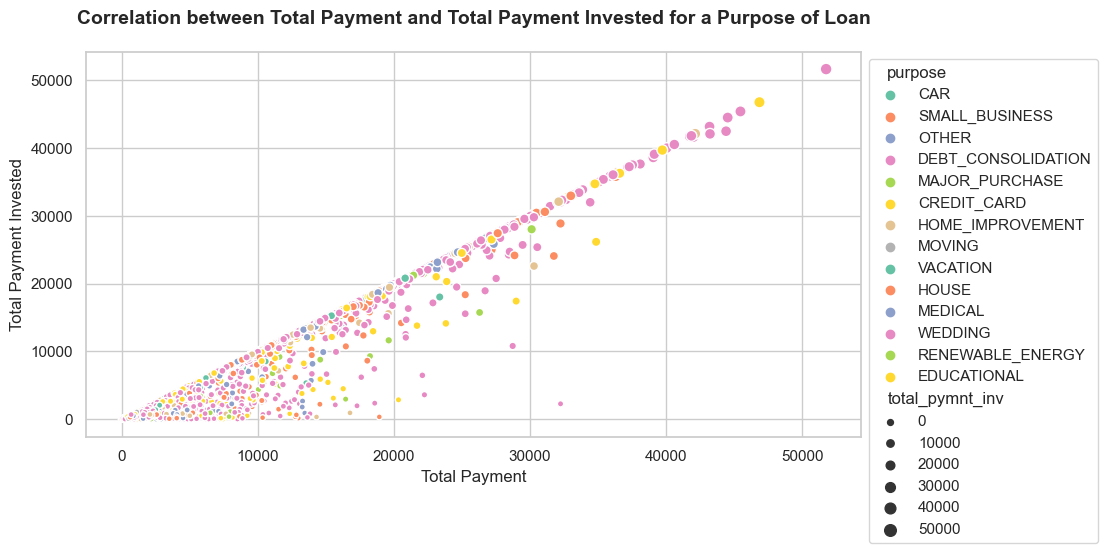

In [89]:
plt.figure(figsize=(10,5))
ax = sns.scatterplot(x="total_pymnt", y="total_pymnt_inv",hue='purpose',size='total_pymnt_inv',
                     palette='Set2',
                     linewidth=1,
                     data=chargedoff_loan_df)

ax.get_legend().set_bbox_to_anchor((1.0, 1.0))

Title='Correlation between Total Payment and Total Payment Invested for a Purpose of Loan'
ax.set_title(Title,fontdict={'fontsize':14,'fontweight':'bold'},loc='center',pad=20)
ax.set_xlabel('Total Payment')
ax.set_ylabel('Total Payment Invested')
plt.show();

Above Plot shows ;
- A positive correlation between Total Payment and Total Payment Investment.
- It shows that the Payments are been regularly received from the Investors for the total amount funded
- Again highest payment invested for the Debt Consolidation and credit cards.

### Analysis of years of experience vs House_residence vs Number of defaults

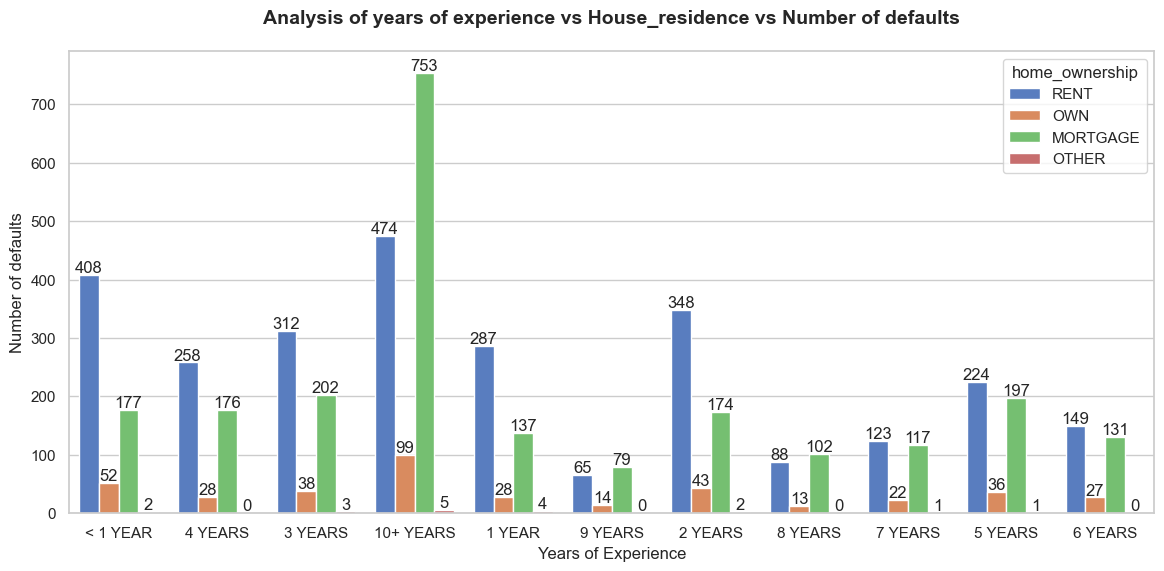

In [90]:
plt.figure(figsize=(14,6))

ax = sns.countplot(x="emp_length",hue = "home_ownership",data = chargedoff_loan_df)
Title='Analysis of years of experience vs House_residence vs Number of defaults'
ax.set_title(Title,fontdict={'fontsize':14,'fontweight':'bold'},loc='center',pad=20)
ax.set_xlabel("Years of Experience")
ax.set_ylabel("Number of defaults")
annotations(ax,5,0)
plt.show();

- Applicants who dont own a House after 10 or more years of Experience have a high default rate.